<a href="https://colab.research.google.com/github/MarieAnthony/My-project/blob/main/Predict_the_insurance_price_of_an_individual_from_the_given_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [ ]:
# import the libraries such as numpy,pandas,matplotlib & seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

In [ ]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

In [ ]:
df['age group'] = pd.cut(df['age'], [0,10,20,30,40,50,60], right=True)
df

,age,sex,bmi,children,smoker,region,charges,BMI group,age group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,"(10.0, 20.0]"
1,18,male,33.770,1,no,southeast,1725.55230,Obese,"(10.0, 20.0]"
2,28,male,33.000,3,no,southeast,4449.46200,Obese,"(20.0, 30.0]"
3,33,male,22.705,0,no,northwest,21984.47061,Healthy weight,"(30.0, 40.0]"
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,"(40.0, 50.0]"
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,"(10.0, 20.0]"
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,"(10.0, 20.0]"
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,"(20.0, 30.0]"


### Using describe(), Answer the following questions: <br>

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df[df['age']<51].mean()


age            32.705703
bmi            30.286492
children        1.171079
charges     11525.019898
dtype: float64

In [ ]:
quantile_value = df['age'].quantile(q=0.75)
for val in df['age']:
    if (val >= quantile_value):
        print(val)

60
62
56
52
56
60
59
63
55
63
62
60
55
60
58
58
53
64
61
53
58
57
57
56
55
53
59
64
54
55
56
61
63
54
55
52
60
58
52
59
61
53
54
51
53
54
63
63
54
58
61
56
51
64
60
59
63
53
53
55
58
59
59
55
63
54
60
63
54
55
56
51
58
52
53
59
59
51
54
55
52
63
59
52
53
56
57
58
52
54
57
64
52
61
52
61
56
64
60
62
62
60
63
57
56
61
57
64
62
55
55
58
64
51
64
52
52
64
63
64
61
60
60
52
59
56
60
56
59
55
57
56
62
56
60
56
54
61
63
51
54
53
61
61
62
51
57
56
51
58
51
51
57
62
59
64
53
63
54
54
54
63
62
52
54
62
57
58
52
59
61
58
52
51
56
64
51
59
56
55
59
58
53
51
64
56
61
58
53
59
52
57
57
64
62
55
60
56
53
53
53
56
53
51
60
60
51
58
51
53
62
53
59
53
64
58
57
64
61
53
51
53
51
60
62
53
58
64
54
60
64
56
63
58
56
59
59
57
53
60
51
55
61
53
57
55
51
57
61
51
57
57
64
54
62
61
60
60
63
59
61
62
62
57
62
59
53
62
56
57
51
54
63
52
51
54
63
51
61
59
54
51
54
55
61
54
55
64
55
57
59
63
54
63
54
60
63
62
55
57
52
56
55
51
52
53
58
54
54
55
53
63
55
57
52
52
52
60
55
58
57
56
52
62
58
51
59
59
52
56
58
52
54
5

In [ ]:
count_above_45 = len(df[df['age'] > 45])
print(count_above_45)

500


In [ ]:
from scipy import stats
total_population = len(df)
percentile = stats.percentileofscore(df['age'],45,kind = 'rank')
percentile.round(2)

61.58

In [ ]:
df.groupby("region")["smoker"].value_counts(normalize = True).unstack()

smoker,no,yes
region,,
northeast,0.793210,0.206790
northwest,0.821538,0.178462
southeast,0.750000,0.250000
southwest,0.821538,0.178462


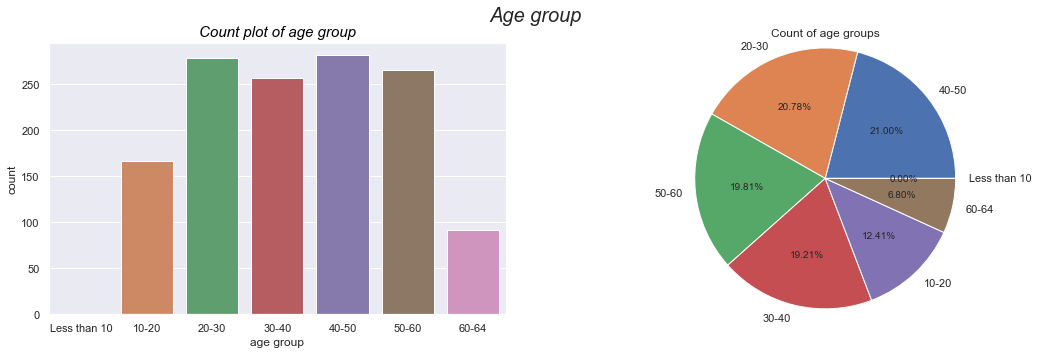

In [ ]:
column = 'age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

In [ ]:
def plot_data(column_name, data):
    plt.figure(figsize = (18,5))

    #Histogram plot using sns.histoplot()
    plt.subplot(1,3,1)
    sns.histplot(data[column_name], kde = False, bins=10)
    plt.title(f"{column_name.capitalize()} Histogram")

    #Distribution plot using sns.distplot()
    plt.subplot(1,3,2)
    sns.distplot(data[column_name], hist = True)
    plt.title(f"{column_name.capitalize()} Distribution plot")

    #Box plot using sns.boxplot()
    plt.subplot(1,3,3)
    sns.boxplot(data[column_name], orient = 'v')
    plt.title(f"{column_name.capitalize()} Box plot")

    plt.show()



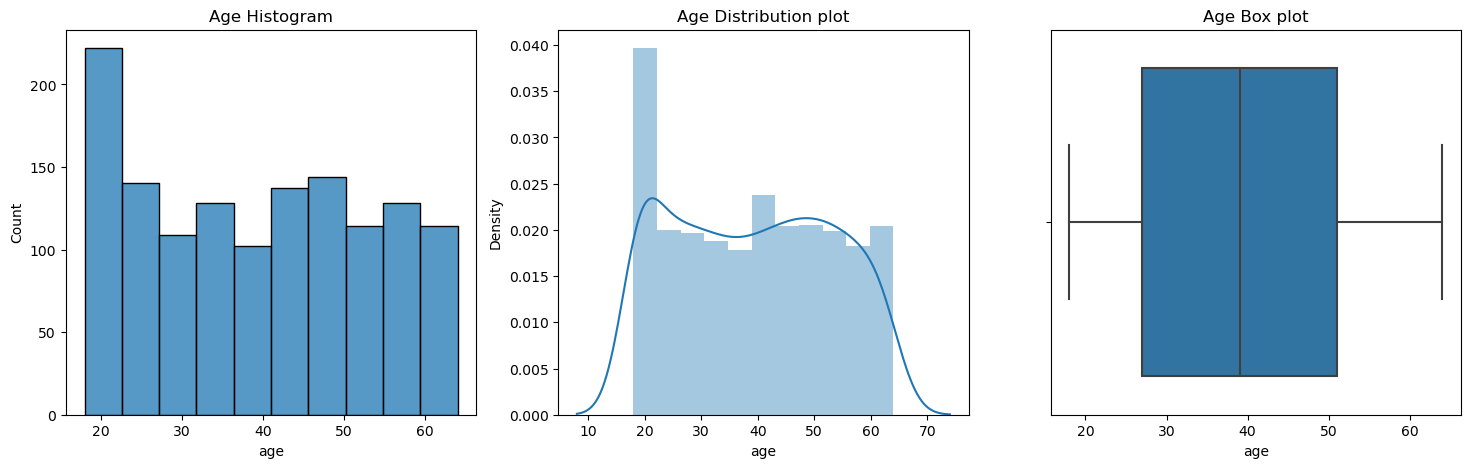

In [ ]:
plot_data('age',df)

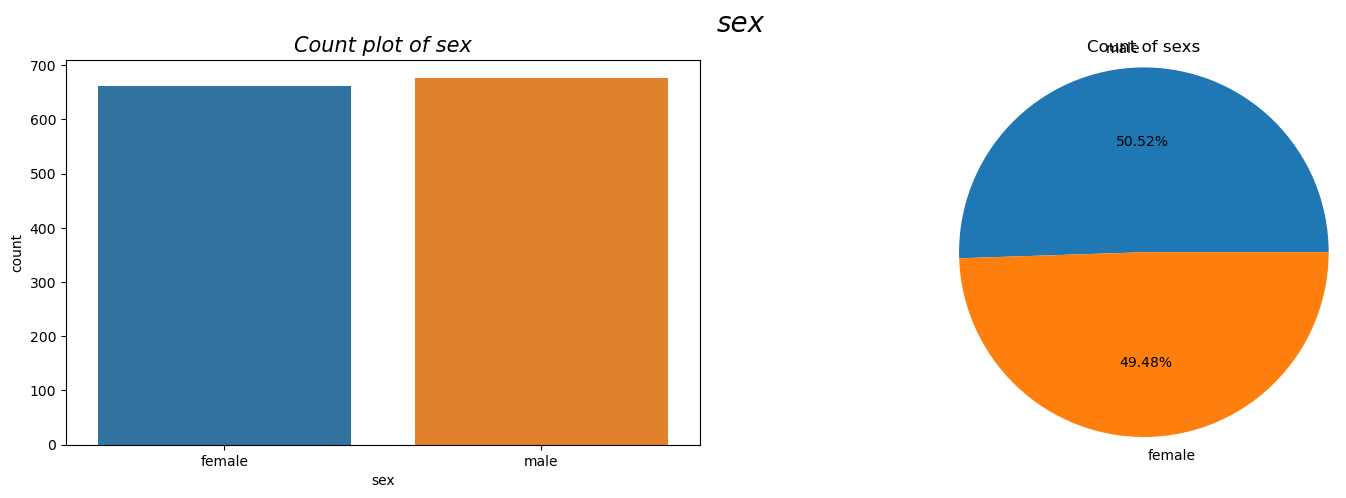

In [ ]:
column = 'sex'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('sex',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

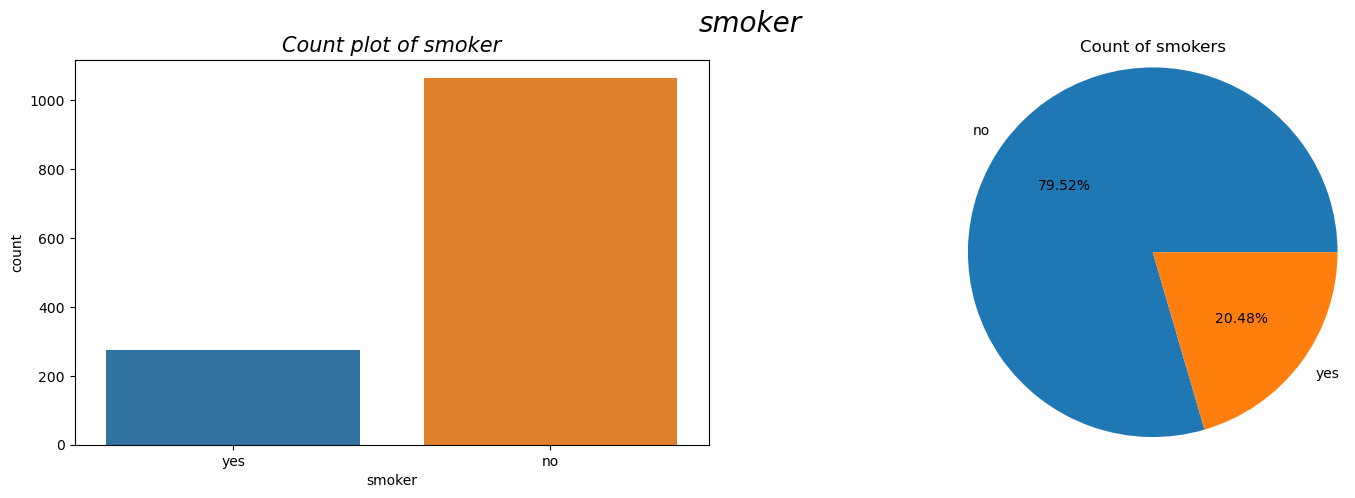

In [ ]:
column = 'smoker'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('smoker',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

In [ ]:
# Encoding Sex Column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker Column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [ ]:
# Encoding region Column
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI group,age group
0,19,1,27.900,0,0,0,16884.92400,Overweight,"(10, 20]"
1,18,0,33.770,1,1,1,1725.55230,Obese,"(10, 20]"
2,28,0,33.000,3,1,1,4449.46200,Obese,"(20, 30]"
3,33,0,22.705,0,1,2,21984.47061,Healthy weight,"(30, 40]"
4,32,0,28.880,0,1,2,3866.85520,Overweight,"(30, 40]"


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


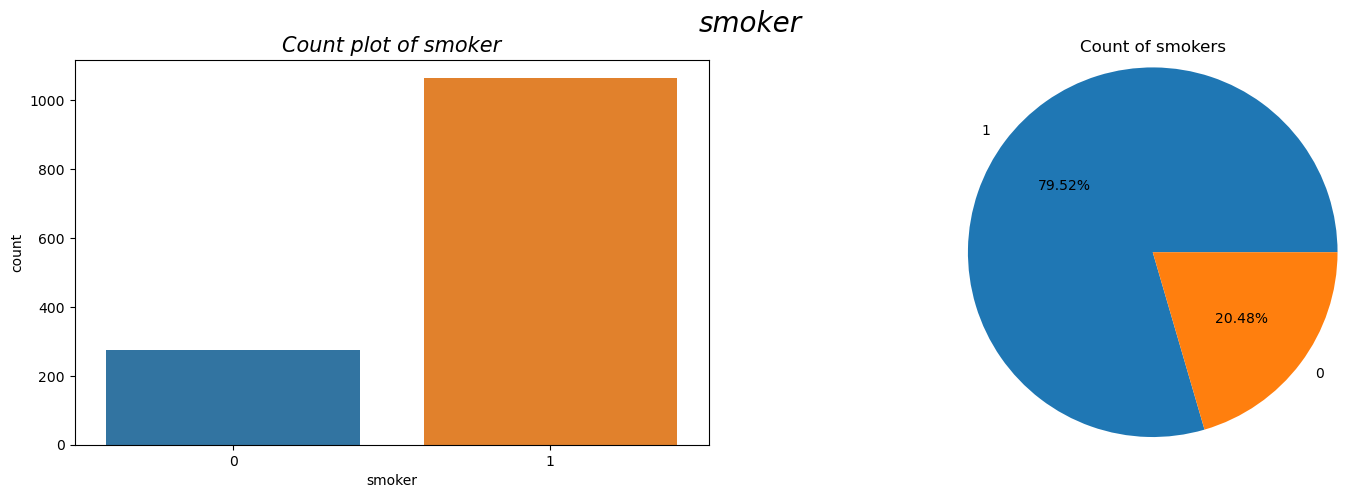

In [ ]:
column = 'smoker'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('smoker',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

In [ ]:
df['BMI group'] = pd.cut(df['bmi'], bins = [0,18.5,25,30,40,53.13], labels = ['Under weight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese'], ordered=False)
df

,age,sex,bmi,children,smoker,region,charges,BMI group,age group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,"(10.0, 20.0]"
1,18,male,33.770,1,no,southeast,1725.55230,Obese,"(10.0, 20.0]"
2,28,male,33.000,3,no,southeast,4449.46200,Obese,"(20.0, 30.0]"
3,33,male,22.705,0,no,northwest,21984.47061,Healthy weight,"(30.0, 40.0]"
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,"(40.0, 50.0]"
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,"(10.0, 20.0]"
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,"(10.0, 20.0]"
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,"(20.0, 30.0]"


![dist%20bmi.png](attachment:dist%20bmi.png)

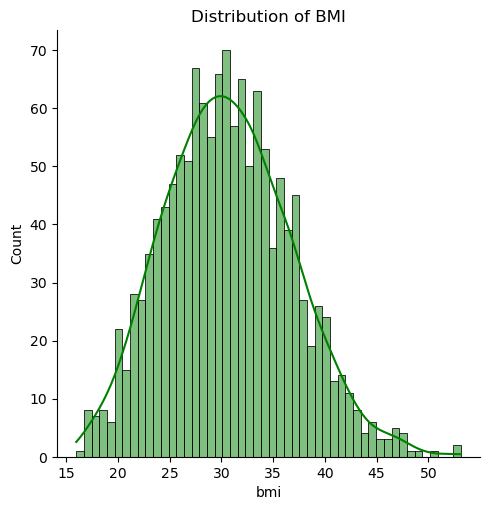

In [ ]:
sns.displot(df.bmi,kde=True,color = 'green',bins=50)
plt.title('Distribution of BMI')
plt.show()

In [ ]:
df.replace({'BMI group':{'Under weight':0, 'Healthy weight':1, 'Overweight':2, 'Obese':3, 'Severely Obese':4}},inplace=True)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI group,age group
0,19,1,27.900,0,0,0,16884.92400,2,"(10, 20]"
1,18,0,33.770,1,1,1,1725.55230,3,"(10, 20]"
2,28,0,33.000,3,1,1,4449.46200,3,"(20, 30]"
3,33,0,22.705,0,1,2,21984.47061,1,"(30, 40]"
4,32,0,28.880,0,1,2,3866.85520,2,"(30, 40]"


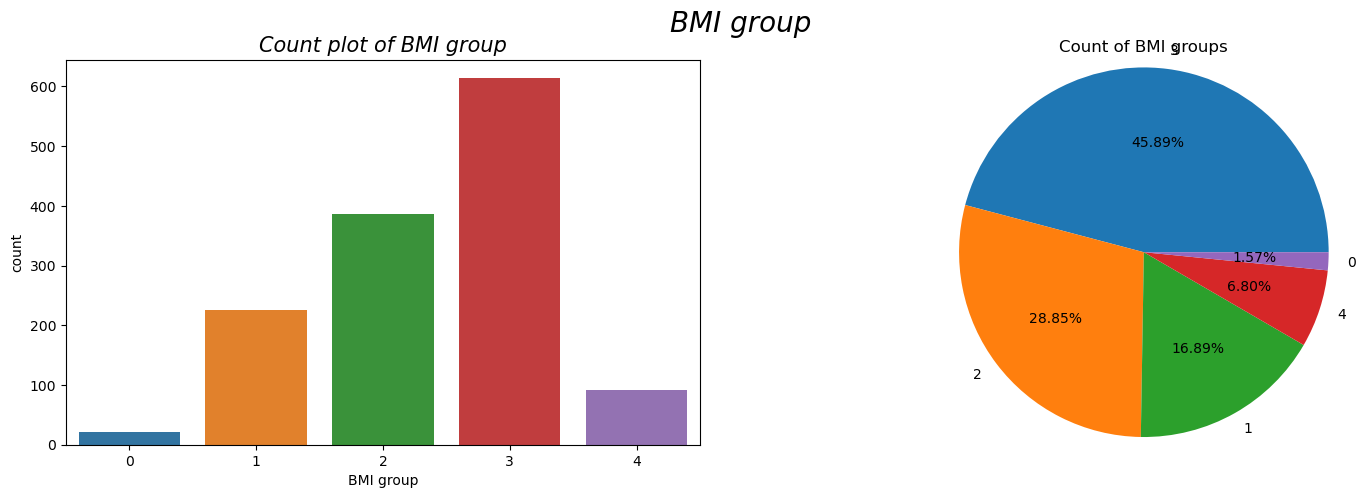

In [ ]:
column = 'BMI group'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('BMI group',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

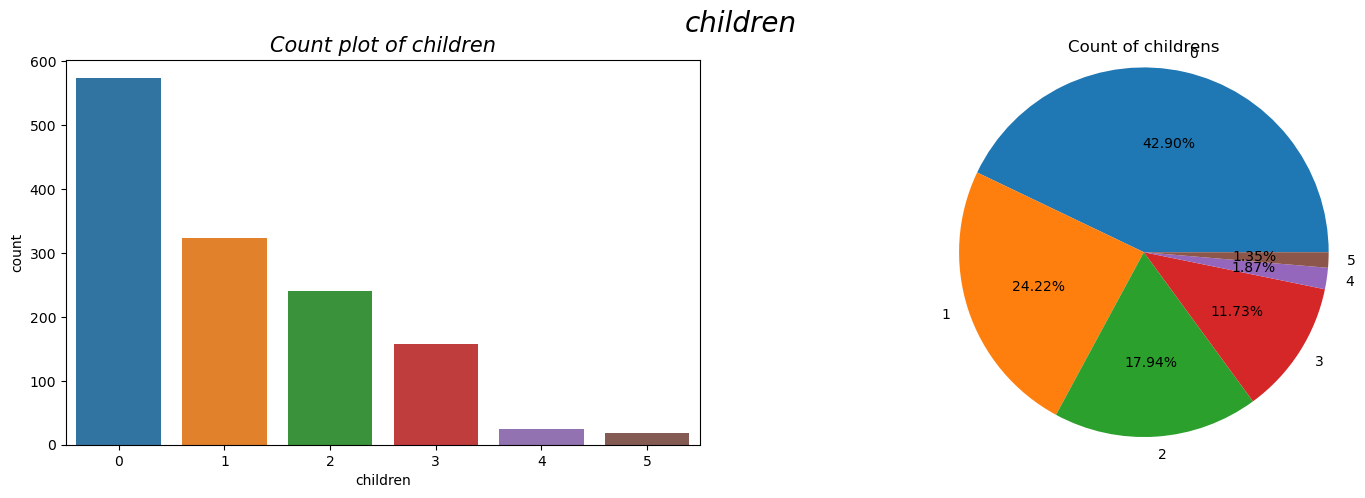

In [ ]:
column = 'children'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('children',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
more_than_2 = df[df['children'] >= 2]
print (more_than_2.count)

<bound method DataFrame.count of       age  sex     bmi  children  smoker  region      charges age group  \
2      28    0  33.000         3       1       1   4449.46200  (20, 30]   
7      37    1  27.740         3       1       2   7281.50560  (30, 40]   
8      37    0  29.830         2       1       3   6406.41070  (30, 40]   
24     37    0  28.025         2       1       2   6203.90175  (30, 40]   
25     59    1  27.720         3       1       1  14001.13380  (50, 60]   
...   ...  ...     ...       ...     ...     ...          ...       ...   
1328   23    1  24.225         2       1       3  22395.74424  (20, 30]   
1329   52    0  38.600         2       1       0  10325.20600  (50, 60]   
1330   57    1  25.740         2       1       1  12629.16560  (50, 60]   
1332   52    1  44.700         3       1       0  11411.68500  (50, 60]   
1333   50    0  30.970         3       1       2  10600.54830  (40, 50]   

     BMI group  
2            3  
7            2  
8            2 

In [ ]:
northeast = [147,77,51,39,7,3]
northwest = [132,74,66,46,6,1]
southeast = [157,95,66,35,5,6]
southwest = [138,78,57,37,7,8]

count = {'northeast' : northeast, 'northwest' : northwest, 'southeast' : southeast, 'southwest':southwest}

df0 = pd.DataFrame(count)

df0

,northeast,northwest,southeast,southwest
0,147,132,157,138
1,77,74,95,78
2,51,66,66,57
3,39,46,35,37
4,7,6,5,7
5,3,1,6,8


In [ ]:
df1 = df0.T
df1

,0,1,2,3,4,5
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


![Screenshot%20%2855%29.png](attachment:Screenshot%20%2855%29.png)

In [ ]:
df1['Total'] = df1.sum(axis = 1)
df1

,0,1,2,3,4,5,Total
northeast,147,77,51,39,7,3,324
northwest,132,74,66,46,6,1,325
southeast,157,95,66,35,5,6,364
southwest,138,78,57,37,7,8,325


In [ ]:
df1['Average'] = df1[[0,1,2,3,4,5]].mean(axis = 1).round(2)
df1

,0,1,2,3,4,5,Total,Average
northeast,147,77,51,39,7,3,324,54.00
northwest,132,74,66,46,6,1,325,54.17
southeast,157,95,66,35,5,6,364,60.67
southwest,138,78,57,37,7,8,325,54.17


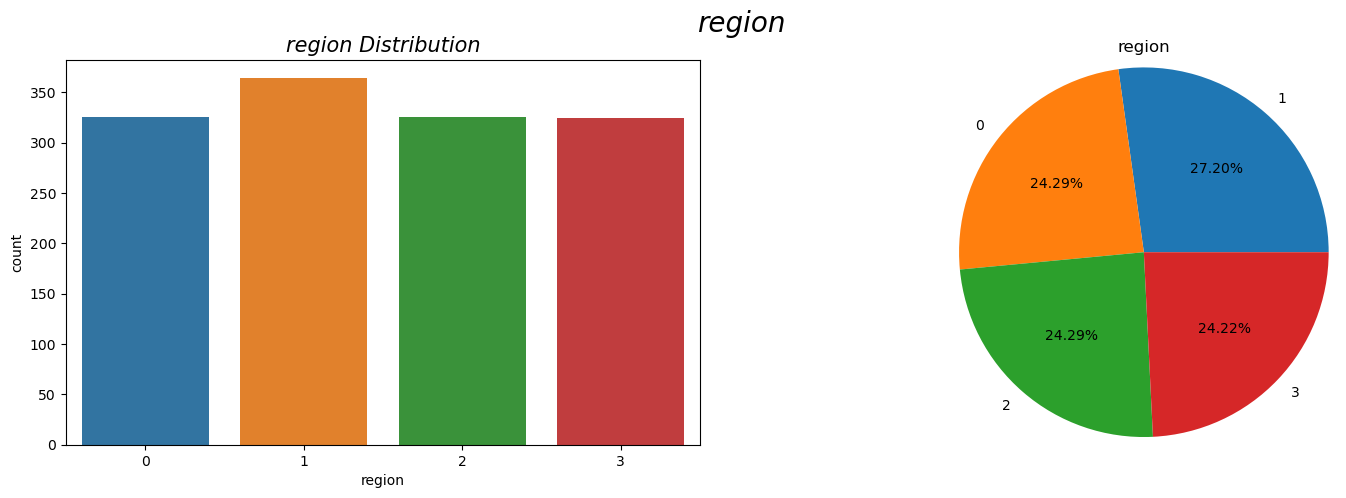

In [ ]:
column = 'region'

fig,axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('region',fontsize=20,fontstyle='oblique')

sns.countplot(ax=axes[0],x=column,data=df)
axes[0].set_title('{} Distribution'.format(column),fontstyle='italic',fontsize=15,color='black')

axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('{}'.format(column))
plt.show()

In [ ]:
table = pd.pivot_table(df, values='charges', index=['region'],
                        aggfunc=np.mean)
table

,charges
region,
0,12346.937377
1,14735.411438
2,12417.575374
3,13406.384516


In [ ]:
df[df['charges']>15000]

,age,sex,bmi,children,smoker,region,charges,age group,BMI group
0,19,1,27.900,0,0,0,16884.92400,"(10.0, 20.0]",2
3,33,0,22.705,0,1,2,21984.47061,"(30.0, 40.0]",1
9,60,1,25.840,0,1,2,28923.13692,"(50.0, 60.0]",2
11,62,1,26.290,0,0,1,27808.72510,NaN,2
14,27,0,42.130,0,0,1,39611.75770,"(20.0, 30.0]",4
...,...,...,...,...,...,...,...,...,...
1318,35,0,39.710,4,1,3,19496.71917,"(30.0, 40.0]",3
1321,62,0,26.695,0,0,3,28101.33305,NaN,2
1323,42,1,40.370,2,0,1,43896.37630,"(40.0, 50.0]",4
1328,23,1,24.225,2,1,3,22395.74424,"(20.0, 30.0]",1


In [ ]:
from scipy import stats
total_population = len(df)
percentile = stats.percentileofscore(df['charges'],15000,kind = 'rank')
percentile.round(2)

73.24

In [ ]:
df.groupby(['age','sex','bmi','children','smoker','region'])['charges'].max()

age  sex  bmi     children  smoker  region
18   0    15.960  0         1       3          1694.79640
          17.290  2         0       3         12829.45510
          21.470  0         1       3          1702.45530
          21.565  0         0       3         13747.87235
          21.780  2         1       1         11884.04858
                                                 ...     
64   1    33.800  1         0       0         47928.03000
          35.970  0         1       1         14313.84630
          39.050  3         1       1         16085.12750
          39.330  0         1       3         14901.51670
          39.700  0         1       0         14319.03100
Name: charges, Length: 1335, dtype: float64

In [ ]:
df.groupby(['age group'])['charges'].max()

age group
(0, 10]             NaN
(10, 20]    39722.74620
(20, 30]    51194.55914
(30, 40]    58571.07448
(40, 50]    62592.87309
(50, 60]    63770.42801
Name: charges, dtype: float64

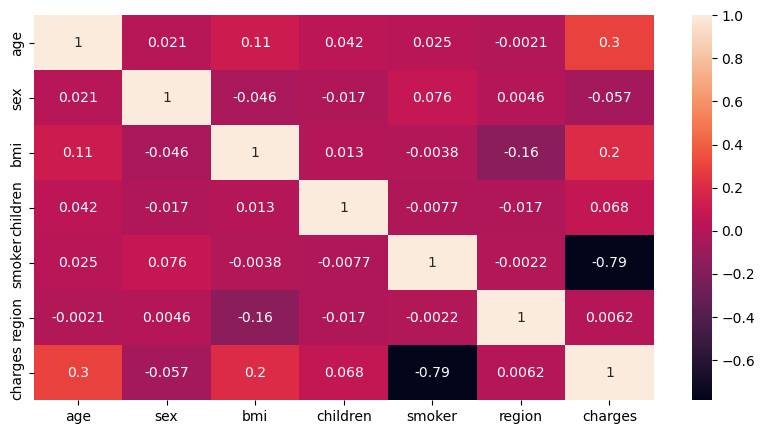

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df2 = df.drop(['age group'], axis=1)

In [ ]:
df3 = df2.drop(['BMI group'], axis=1)


In [ ]:
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI group,age group
0,19,1,27.900,0,0,0,16884.92400,2,"(10, 20]"
1,18,0,33.770,1,1,1,1725.55230,3,"(10, 20]"
2,28,0,33.000,3,1,1,4449.46200,3,"(20, 30]"
3,33,0,22.705,0,1,2,21984.47061,1,"(30, 40]"
4,32,0,28.880,0,1,2,3866.85520,2,"(30, 40]"


In [ ]:
df5 = df.drop(['age group'], axis=1)


In [ ]:
robust_scaled_df5 = pd.DataFrame(robust_scale(df5),
                                columns=df5.columns)

In [ ]:
robust_scaled_df5[['age','sex','children','smoker','region','bmi']].describe()

,age,sex,children,smoker,region,bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.008626,0.494768,0.047459,-0.204783,0.484305,0.031366
std,0.585415,0.500160,0.602746,0.403694,1.104885,0.726191
min,-0.875000,0.000000,-0.500000,-1.000000,-1.000000,-1.719559
25%,-0.500000,0.000000,-0.500000,0.000000,0.000000,-0.488687
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.500000,0.000000,1.000000,0.511313
max,1.041667,1.000000,2.000000,0.000000,2.000000,2.706758


In [ ]:
robust_scaled_df5.head()

,age,sex,bmi,children,smoker,region,charges,BMI group
0,-0.833333,1.0,-0.297708,-0.5,-1.0,-1.0,0.630515,-1.0
1,-0.875000,0.0,0.401310,0.0,0.0,0.0,-0.643422,0.0
2,-0.458333,0.0,0.309616,1.0,0.0,0.0,-0.414515,0.0
3,-0.250000,0.0,-0.916344,-0.5,0.0,1.0,1.059062,-2.0
4,-0.291667,0.0,-0.181006,-0.5,0.0,1.0,-0.463475,-1.0


In [ ]:
robust_scaler = RobustScaler(copy=True,
                             with_centering=True,
                             with_scaling=True)

robust_scaler

RobustScaler()

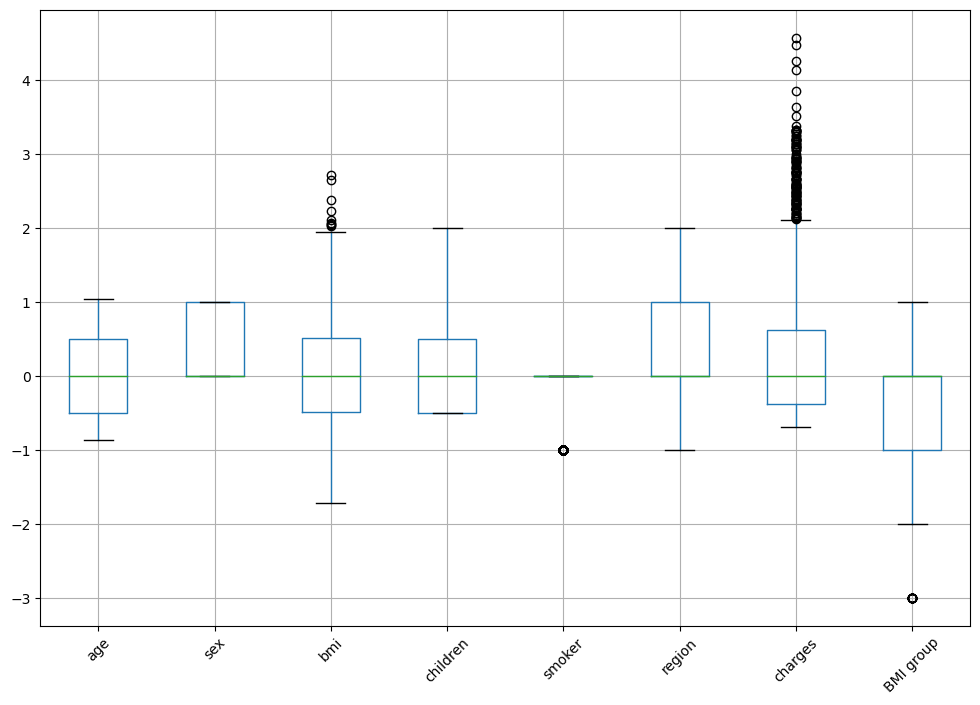

In [ ]:
robust_scale_array = robust_scaler.fit_transform(df5)

robust_scaled_df5 = pd.DataFrame(robust_scale_array, columns=df5.columns)

robust_scaled_df5.boxplot(figsize=(12,8), rot=45)

plt.show();

'''In the presence of outliers, StandardScaler does not guarantee balanced feature scales,
due to the influence of the outliers while computing the empirical mean and standard deviation.
This leads to the shrinkage in the range of the feature values. By using RobustScaler(),
we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.'''

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

In [ ]:
# Run this cell
X = df.drop('charges',axis=1)
y = df['charges']

In [ ]:
# Run this cell
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

NameError: name 'X' is not defined

In [ ]:
# Run this cell
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [ ]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X, y)}')

Coefficients: [ 0.29850404 -0.01083068  0.16747093  0.03959935  1.96773894  0.02921321]
Intercept: -0.48420733327933374
R^2 score: 0.7507372027994937


In [ ]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:42   Log-Likelihood:                -969.13
No. Observations:                1338   AIC:                             1952.
Df Residuals:                    1331   BIC:                             1989.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4842      0.030    -16.019      0.000      -0.544      -0.425
age            0.2985      0.014     21.647      0.000       0.271       0.326
sex           -0.0108      0.027     -0.394      0.694      -0.065       0.043
bmi            0.1675      0.014     11.997      0.000       0.140       0.195
children       0.0396      0.011      3.483      0.001       0.017       0.062
smoker         1.9677      0.034     57.839      0.000       1.901       2.034
region         0.0292      0.013      2.328      0.020       0.005       0.054
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

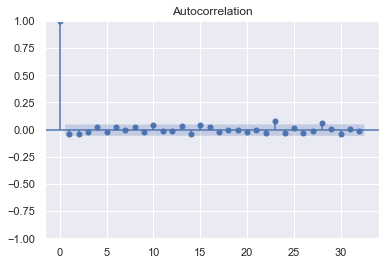

In [ ]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

In [ ]:
# Run the below cell
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=713.9748044872917, pvalue=0.0)


In [ ]:
Jarque_bera_value = input('enter the value')

if Jarque_bera_value > str(0.05):
    print("Normal distribution")
else:
    print("Non-normal distribution")

enter the value713.97
Normal distribution


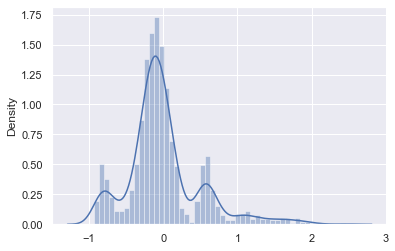

In [ ]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

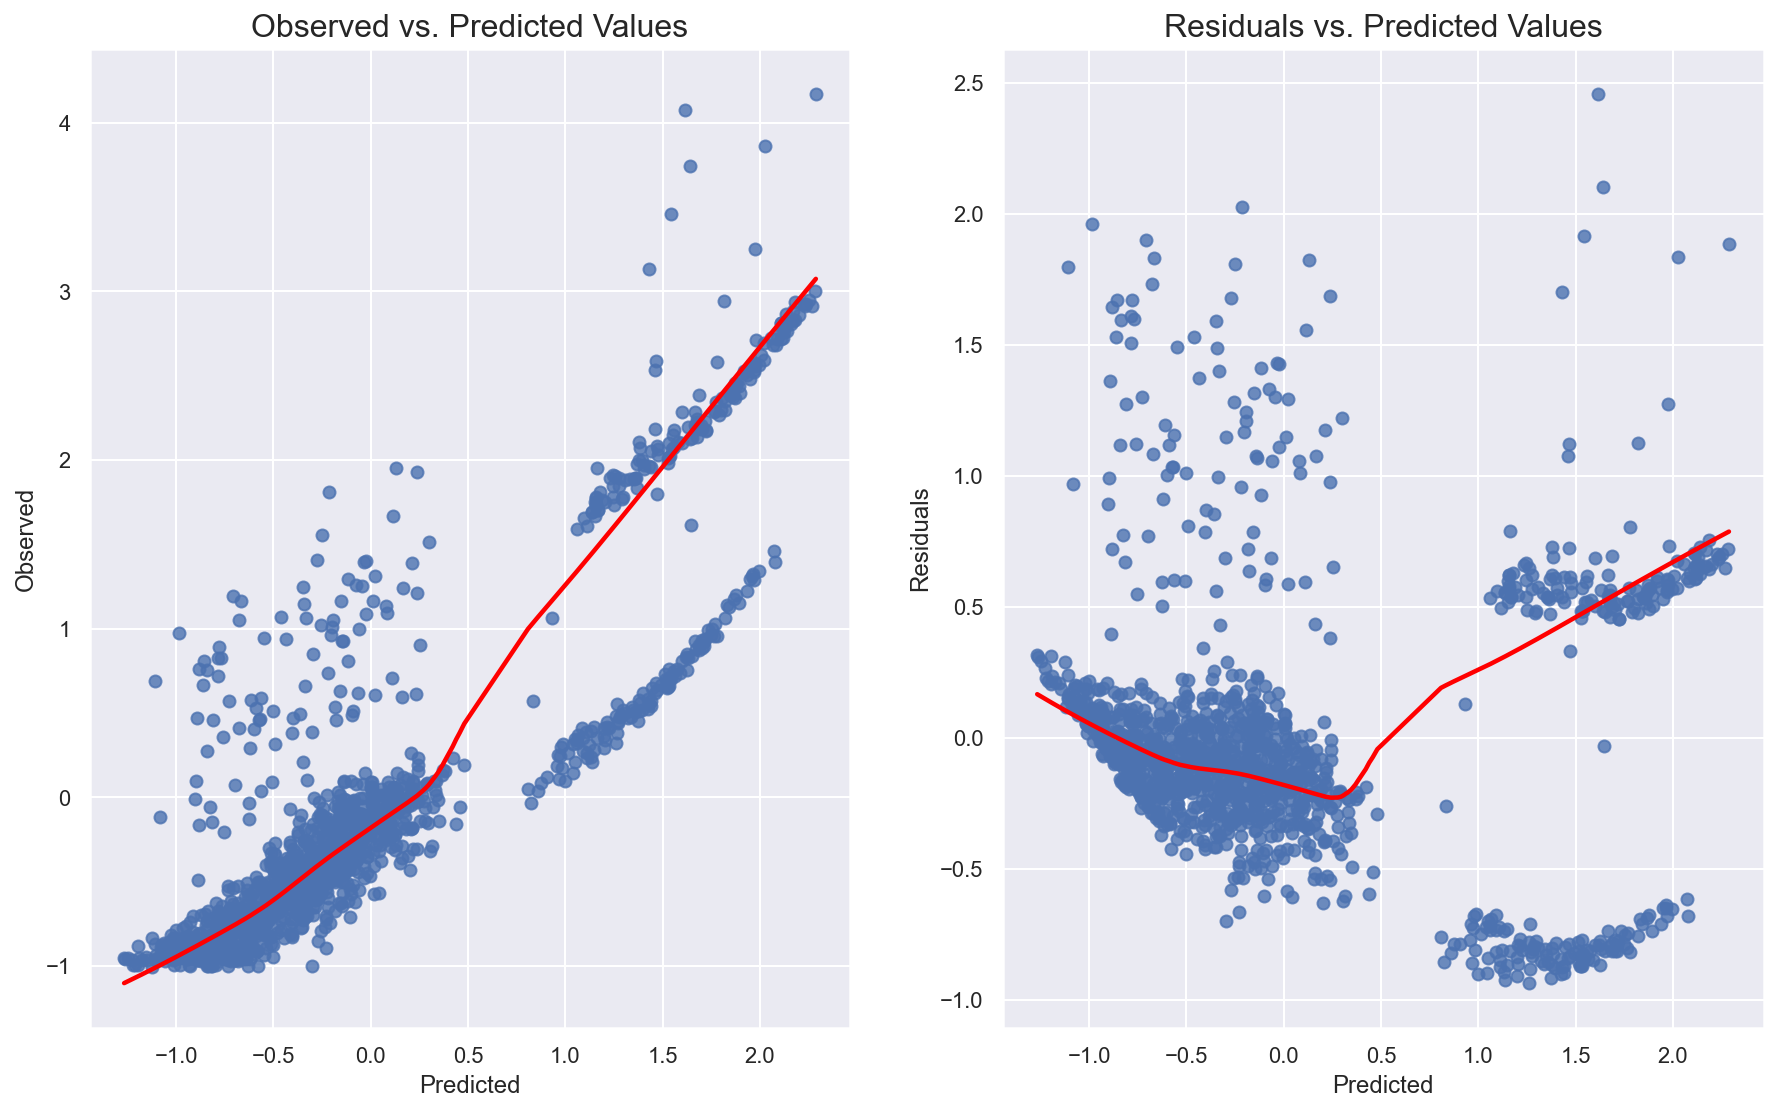

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.

    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals
    resids = model.resid

    fig, ax = plt.subplots(1,2)

    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(lin_reg, y)

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1339499149847379, 0.05261918323237715)

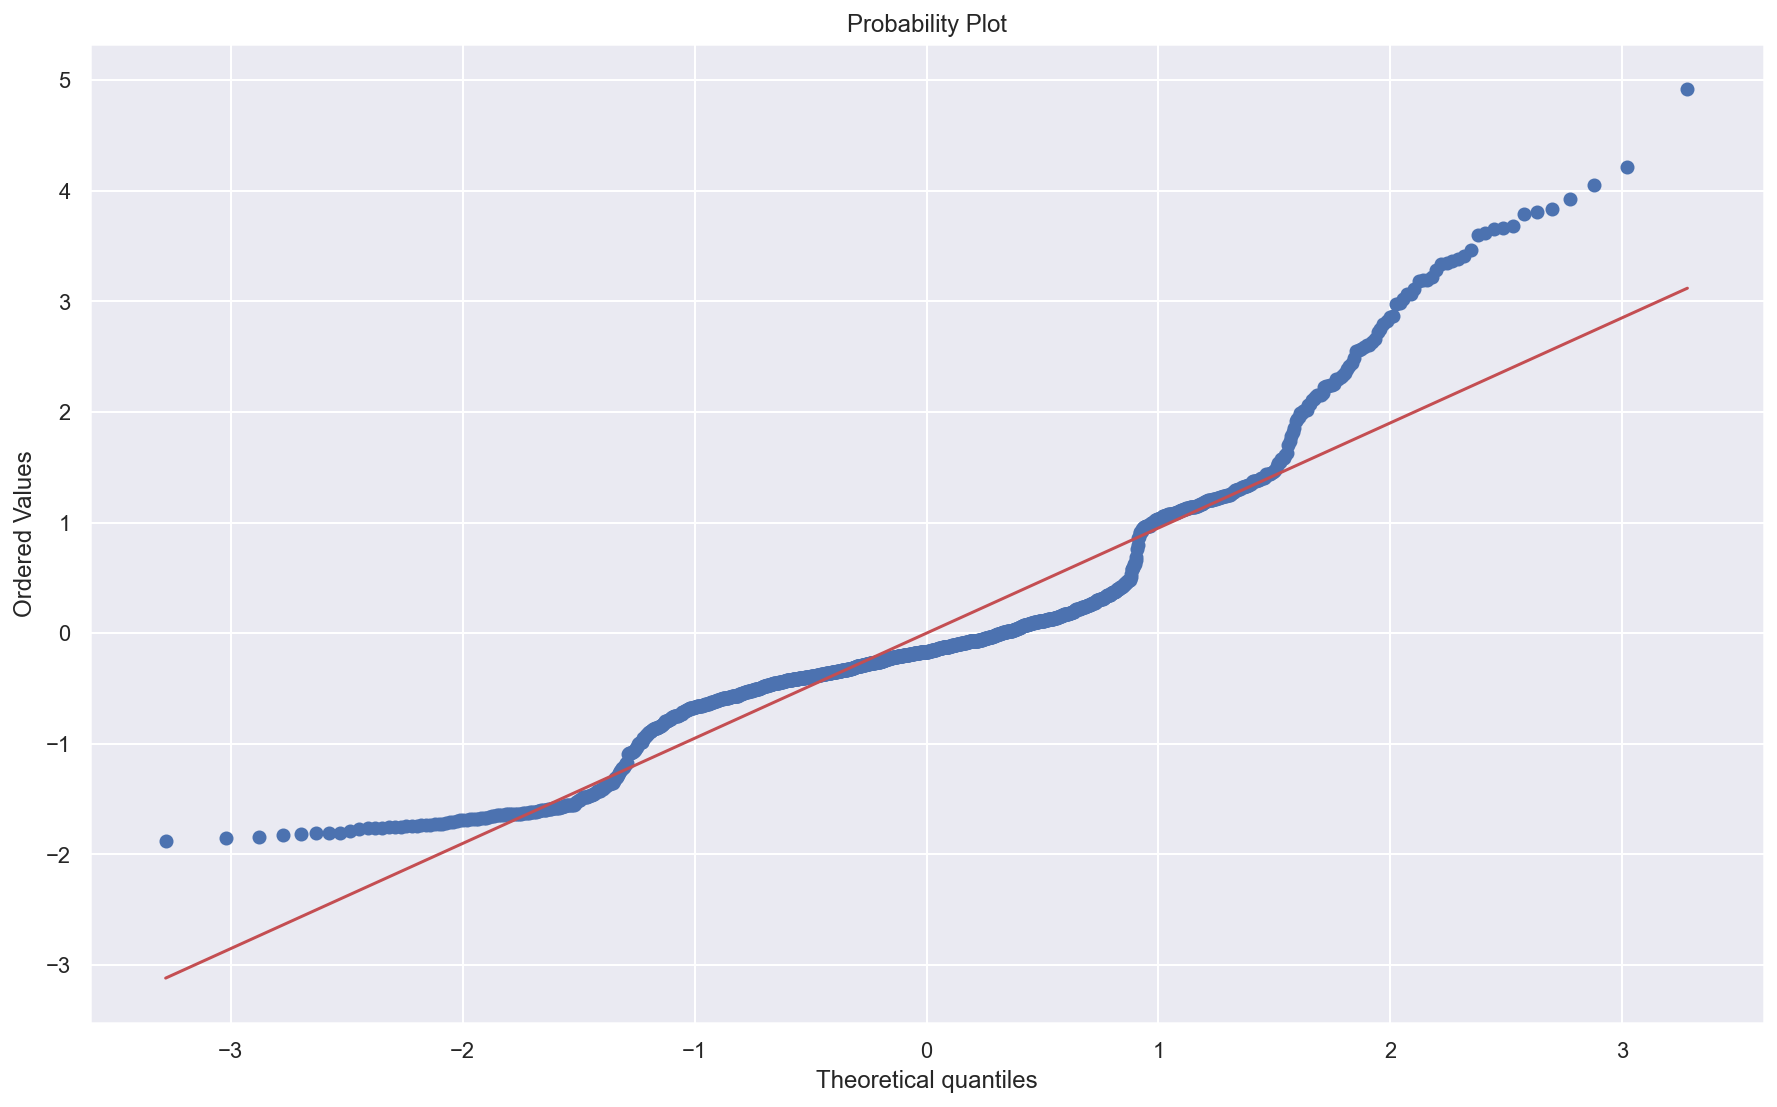

In [ ]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [ ]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

1.0233468283035916e-15

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

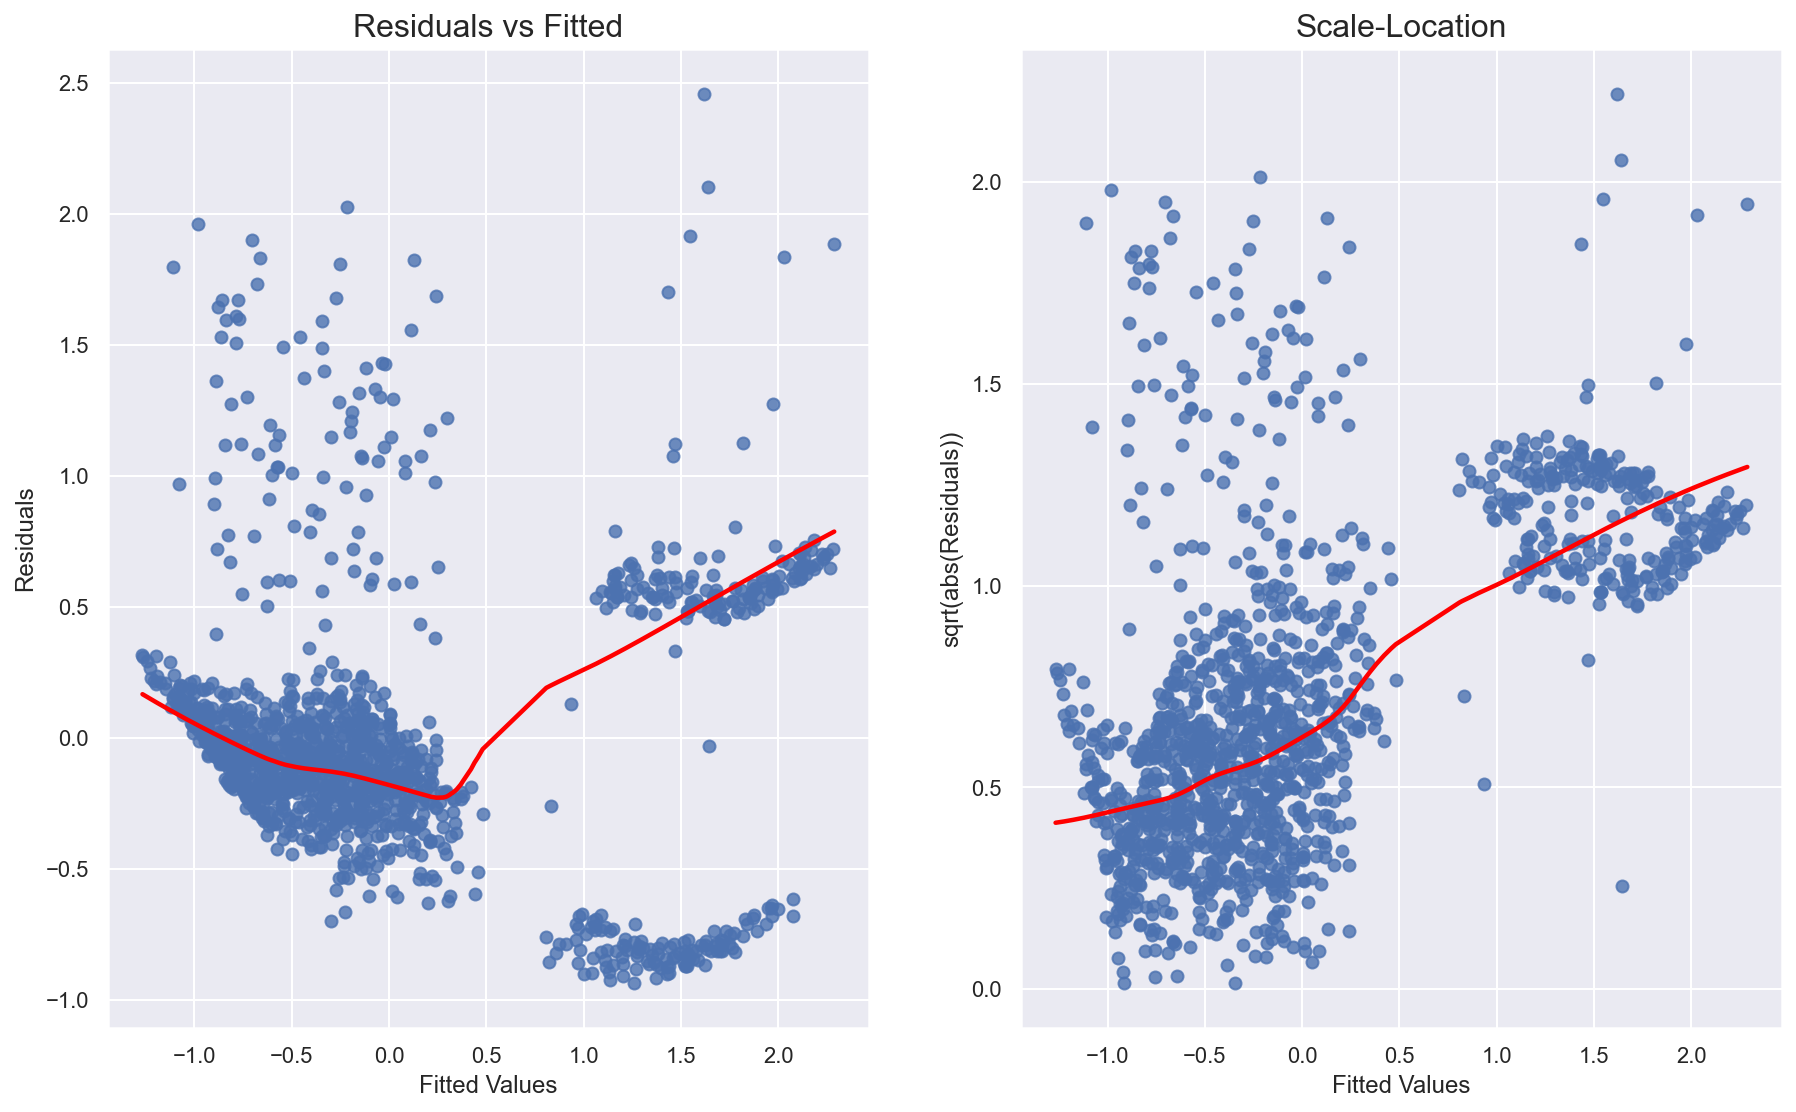

In [ ]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [ ]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 0.9566557936681559), ('p-value', 0.7155988668351111)]

In [ ]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated.
# If there is a very huge value for vif, then there might be chance of high collinearity
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region
vif,1.015394,1.008889,1.040608,1.002482,1.006466,1.025966


In [ ]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

In [ ]:
df5.head()

,age,sex,bmi,children,smoker,region,charges,BMI group
0,19,1,27.900,0,0,0,16884.92400,2
1,18,0,33.770,1,1,1,1725.55230,3
2,28,0,33.000,3,1,1,4449.46200,3
3,33,0,22.705,0,1,2,21984.47061,1
4,32,0,28.880,0,1,2,3866.85520,2


In [ ]:
# Dividing the data into target and features
X = df5.iloc[:,:-1]
y = df5['charges']

In [ ]:
# Spliting the data into training and testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# checking the shape of train test data
print(X.shape,X_train.shape,X_test.shape)

(1338, 7) (1070, 7) (268, 7)


In [ ]:
# Model Training
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = df5.drop(['charges'], axis = 1)
y = df5.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7968973368078106


In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3711103.603, MSE test data: 18999235.865
R2 train data: 0.974, R2 test data: 0.879


In [ ]:
# Prediction on training Data
train_predictor = lr.predict(X_train)

NameError: name 'lr' is not defined

In [ ]:
# R square in train data
r2_train = metrics.r2_score(y_train,train_predictor)
print('R Squared Values: ',r2_train)

NameError: name 'metrics' is not defined

In [ ]:
# Adjusted R square in train data
adj_r2_train = 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Adjusted R Squared Values: ',adj_r2_train)

Adjusted R Squared Values:  0.7505925117702793


In [ ]:
# Prediction on test Data
test_predictor = lr.predict(X_test)

In [ ]:
# R square in test data
r2_test = metrics.r2_score(y_test,test_predictor)
print('R Squared Values: ',r2_test)

R Squared Values:  0.7445422986536503


In [ ]:
# Adjusted R square in train data
adj_r2_test = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Values: ',adj_r2_test)

Adjusted R Squared Values:  0.738669707818102


--> From above we can see the vale for r-square are close for train and test data so there is no over or underfiting of data

## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
# We will use either Lasso or Ridge Regression to regularize the data, reducing the overfitting degree.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# We are using cross validation to reduced the biased values.
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
space=dict()
space['solver'] = ['svd','cholesky','lsqr','sag']
space['alpha'] = [0.01,0.1,1,10]
space['fit_intercept'] = ['True','False']

# model name, space dictionary is given to analyze the combinations
# Get the metrics list using this function -  sklearn.metrics.get_scorer_names()
# fianlly, cross validation data is given.
search = GridSearchCV(model,space,scoring='neg_mean_squared_error',cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.25222796505913814
Best Hyperparameters: {'alpha': 1, 'fit_intercept': 'True', 'solver': 'sag'}


## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

In [ ]:
input_data=(31,1,25.74,0,1,0)

#changing input to a numpy array
np_input = np.asarray(input_data)

#reshape the array
np_input_reshape=np_input.reshape(1,-1)

price_predict = lr.predict(np_input_reshape)
print('The Insurance cost for the given input will be $',price_predict[0])

The Insurance cost for the given input will be $ 3587.820558639947
